In [12]:
from pop4sim import fetch_wpp, group_5yr, Demography, ModelAgeSex, reform_pars_agesex
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
def draw_pyramid(sol, demo, yrs=[2000, 2005, 2010]):
    fig, axes = plt.subplots(1, len(yrs))
    errors = list()
    for i, yr in enumerate(yrs):
        y = sol.sol(yr + 0.5).reshape((101, 2))
        nx = demo(yr + 0.5)['N']

        ns_f, labels = group_5yr(y[:, 0])
        ns_m, _ = group_5yr(y[:, 1])

        nd_f, _ = group_5yr(nx[:, 0])
        nd_m, _ = group_5yr(nx[:, 1])

        axes[i].scatter(nd_f, labels, color='b')
        axes[i].scatter(-nd_m, labels, color='y')
        axes[i].barh(width=ns_f, y=labels, color='b', alpha=0.2)
        axes[i].barh(width=ns_m, left=-ns_m, y=labels, color='y', alpha=0.2)
        axes[i].set_title(f'Year: {yr}')
        
        err = ((ns_f / nd_f - 1) ** 2).sum() + ((ns_m / nd_m - 1) ** 2).sum()
        errors.append(err)
        
    fig.tight_layout()
    return fig, axes, errors

In [13]:
ext = fetch_wpp(loc='VN', year0=2000, year1=2010)

Fetch population size
Fetch deaths
Fetch birth rate
Fetch sex ratio at birth


## Single Age, F/M

In [6]:
demo, _ = reform_pars_agesex(ext, mig=False)
model = ModelAgeSex(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)

[0.00106264376881086, 0.0009255606245528066, 0.0010453056518375098]


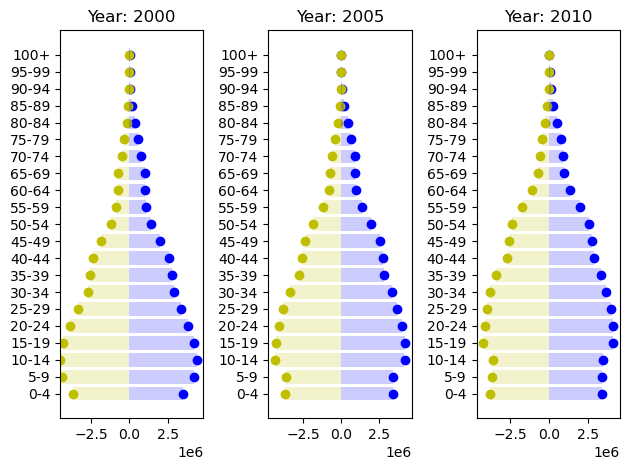

In [7]:
fig, axes, errors = draw_pyramid(sol, demo)
print(errors)

In [8]:
demo, _ = reform_pars_agesex(ext, mig=True, opt_mig=False)
model = ModelAgeSex(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)

[0.04306594039880371, 0.014126387615319556, 0.0193638780425308]


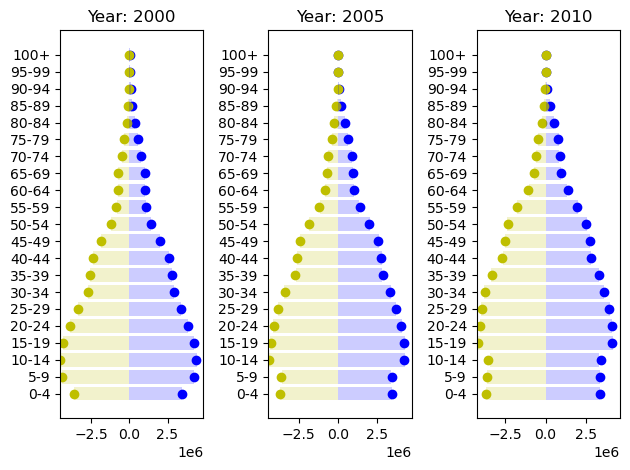

In [9]:
fig, axes, errors = draw_pyramid(sol, demo)
print(errors)

In [10]:
demo, _ = reform_pars_agesex(ext, mig=True, opt_mig=True)
model = ModelAgeSex(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)

100%|██████████| 12/12 [04:25<00:00, 22.11s/it]


[0.01709803362232517, 0.00030499416693130466, 0.00040249906282529375]


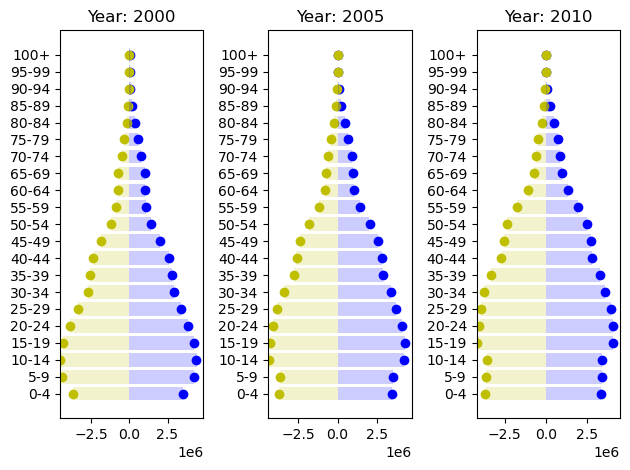

In [11]:
fig, axes, errors = draw_pyramid(sol, demo)
print(errors)